In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Performance Metrices
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns


# **Data Verification **

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/MACHINE LEARNING DATA/Delhi_v2.csv")
data.shape

(7738, 18)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [ ]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


***[Use the loc method to select the column by name:]***

**df.loc[:, 'column_name']**

In [ ]:
data.loc[:, 'Address']


0                       Noida Extension, Noida, Delhi NCR
1                           Sector 79, Gurgaon, Delhi NCR
2                          Vaishali, Ghaziabad, Delhi NCR
3       Link Road, F Block, Sector 50, Noida, Uttar Pr...
4       Jaypee Pavilion Court Sector 128, Noida, Secto...
                              ...                        
7733                    Indirapuram, Ghaziabad, Delhi NCR
7734    Greater Noida, Sector 2, Greater Noida, Delhi NCR
7735             Crossings Republik, Ghaziabad, Delhi NCR
7736    Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...
7737    sandal apartment, Shalimar Garden Extension 1,...
Name: Address, Length: 7738, dtype: object

**This will select all rows in the DataFrame and the column named column_name.**

**Use the iloc method to select the column by position:**
df.iloc[:, 0]

In [ ]:
data.iloc[:,1]


0        5600000.0
1        8800000.0
2       16500000.0
3        3810000.0
4        6200000.0
           ...    
7733     7900000.0
7734     4510000.0
7735     7000000.0
7736     6500000.0
7737     6500000.0
Name: price, Length: 7738, dtype: float64

**This will select all rows in the DataFrame and the column at position 0.**

**Use the at method to select a single value from a specific row and column:**

df.at[0, 'column_name']


In [ ]:
data.at[2, 'Furnished_status']

'Unfurnished'

**The describe() function** computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.

In [ ]:
data.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [ ]:
data.isnull().any()

Unnamed: 0          False
price               False
Address             False
area                False
latitude            False
longitude           False
Bedrooms            False
Bathrooms           False
Balcony              True
Status               True
neworold            False
parking              True
Furnished_status     True
Lift                 True
Landmarks            True
type_of_building    False
desc                False
Price_sqft          False
dtype: bool

In [ ]:
data.fillna(value='', inplace=True)

In [ ]:
data.isnull().any()

Unnamed: 0          False
price               False
Address             False
area                False
latitude            False
longitude           False
Bedrooms            False
Bathrooms           False
Balcony             False
Status              False
neworold            False
parking             False
Furnished_status    False
Lift                False
Landmarks           False
type_of_building    False
desc                False
Price_sqft          False
dtype: bool

In [ ]:
data.isnull().count()

Unnamed: 0          7738
price               7738
Address             7738
area                7738
latitude            7738
longitude           7738
Bedrooms            7738
Bathrooms           7738
Balcony             7738
Status              7738
neworold            7738
parking             7738
Furnished_status    7738
Lift                7738
Landmarks           7738
type_of_building    7738
desc                7738
Price_sqft          7738
dtype: int64

<Axes: >

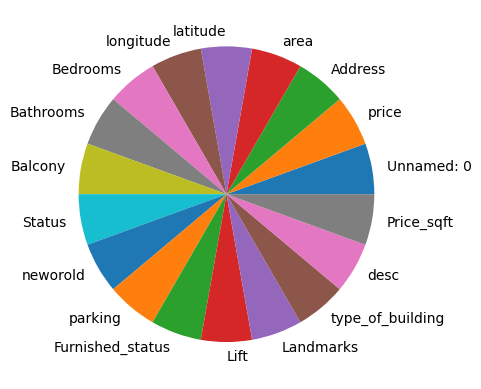

In [ ]:
data.count().plot.pie()

<Axes: >

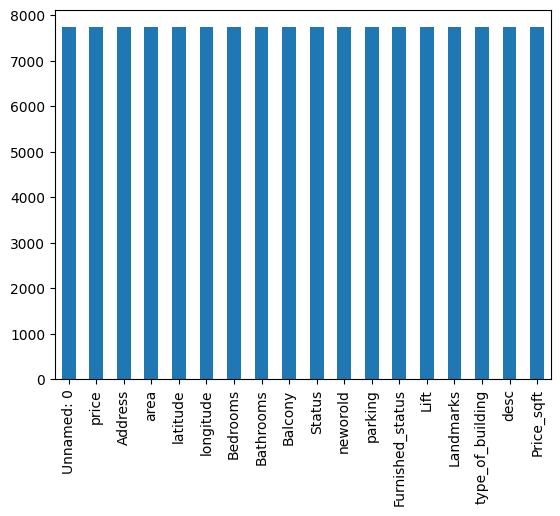

In [ ]:
data.count().plot.bar()

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data[['area', 'Bedrooms', 'Bathrooms']], data['price'], test_size=0.2)

In [ ]:
# Create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculate the training accuracy
training_accuracy = model.score(X_train, y_train)


# Calculate the testing accuracy
testing_accuracy = model.score(X_test, y_test)



In [ ]:
# Compare the training accuracy and testing accuracy
print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)

Training accuracy: 0.7231729630235921
Testing accuracy: 0.7357427600585642


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
predictions

array([ 2922657.02857063,  2846326.46954538,  3609632.05979789, ...,
       11243208.51943145,  7015980.54985653, 13122425.27187659])

In [ ]:
data=pd.DataFrame({'Actual price':y_test, 'Predicted price':predictions})
data.head(5)

,Actual price,Predicted price
3971,1900000.0,2.922657e+06
40,3500000.0,2.846326e+06
1632,3200000.0,3.609632e+06
5745,11000000.0,1.045086e+07
5297,14000000.0,1.510754e+07


In [ ]:
y_test = y_test.astype('int32')
predictions = predictions.astype('int32')

In [ ]:
data=pd.DataFrame({'Actual price':y_test, 'Predicted price':predictions})
data.head(5)

,Actual price,Predicted price
3971,1900000,2922657
40,3500000,2846326
1632,3200000,3609632
5745,11000000,10450855
5297,14000000,15107540


In [ ]:
# Calculate the mean squared error (MSE) between the predicted values and the actual values
mse = np.mean((predictions - y_test)**2)
mse

6211292.832687339

In [ ]:
# Calculate the root mean squared error (RMSE) between the predicted values and the actual values
rmse = np.sqrt(mse)
rmse

2492.246543319368

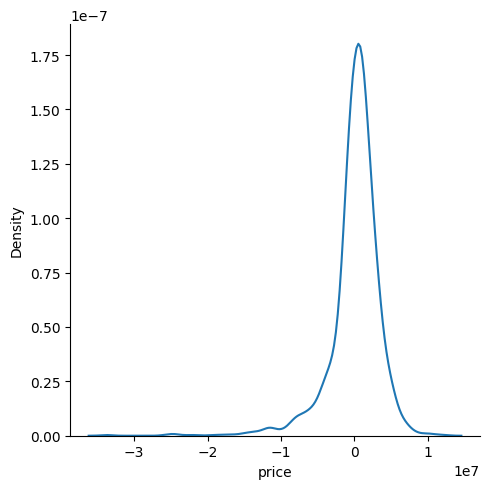

In [ ]:
sns.displot(predictions-y_test, kind='kde')

In [ ]:
# Get the slope and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_


In [ ]:
# Generate x values
x_values = np.linspace(0, 10, 100)

# Calculate y values
y_values = slope * x_values + intercept

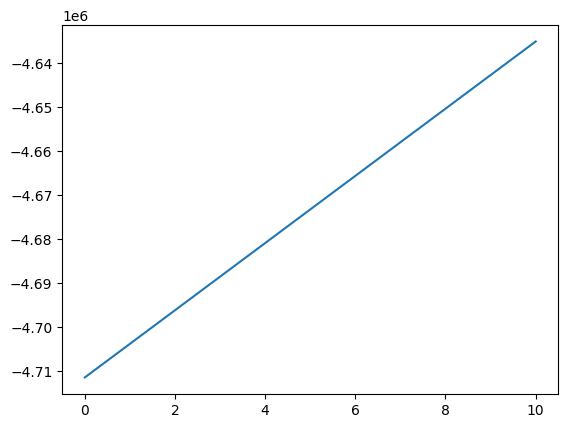

In [ ]:
# Plot the line
plt.plot(x_values, y_values)